In [19]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [64]:
filepath = "Res_GRE_kroa.json"

In [65]:
with open(filepath) as json_data:
    d = json.load(json_data)
    json_data.close()

In [22]:
_, method_sign , pick_method, _, instance = filepath.split('_')

ValueError: not enough values to unpack (expected 5, got 3)

In [66]:
method_sign = "GC"
pick_method = "Rand"
instance = "Krob 200"

In [67]:
X = []
Y = []
for i in d['unordered nodes']:
    X.append(i['X'])
    Y.append(i['Y'])

In [54]:
option = "best order"
match method_sign:
    case "NN":
      method = "Najbliższy Sąsiad"
    case "GC":
      method = "Zachłanny Cykl"
    case "REG":
      method = "Żal"  
    case "WREG":
      method = "Żal ważony"
    case _:
      method = "unknown"
match option:
    case "best order":
        which_order = "Najlepszy cykl"
    case "worst order":
        which_order = "Najgorszy cykl"
    case _:
        which_order = "unknown"
match pick_method:
    case "RandC":
      pick = "losowe najbliższe węzły"
    case "RandF":
      pick = "losowe najdalsze węzły"
    case "Rand":
      pick = "losowe węzły"

In [55]:
cycle1 = d[option][0]
cycle2 = d[option][1]

In [56]:
f = lambda x: [X[x], Y[x]]

In [57]:
cycle_1 = []
for i in cycle1:
    cycle_1.append(f(i))
cycle_1.append(cycle_1[0])

In [58]:
cycle_2 = []
for i in cycle2:
    cycle_2.append(f(i))
cycle_2.append(cycle_2[0])

In [59]:
from numpy.linalg import norm
n = len(d['unordered nodes'])
distance_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        distance_matrix[i,j] = np.round(norm(np.array([d['unordered nodes'][i]["X"]-d['unordered nodes'][j]["X"],d['unordered nodes'][i]["Y"]-d['unordered nodes'][j]["Y"]])))
distance_matrix

array([[   0., 2607.,  549., ..., 1240., 1232., 3117.],
       [2607.,    0., 3154., ..., 3442., 1644.,  933.],
       [ 549., 3154.,    0., ..., 1097., 1713., 3658.],
       ...,
       [1240., 3442., 1097., ...,    0., 2398., 3680.],
       [1232., 1644., 1713., ..., 2398.,    0., 2406.],
       [3117.,  933., 3658., ..., 3680., 2406.,    0.]], shape=(200, 200))

In [60]:
def cycle_length(cycle, distance_matrix):
    cost = 0
    for i in range(len(cycle)):
        cost += distance_matrix[cycle[i],cycle[(i+1)%len(cycle)]]
    return int(cost)

In [61]:
cycle1_color = "#df2935"
cycle2_color = "#3772ff"

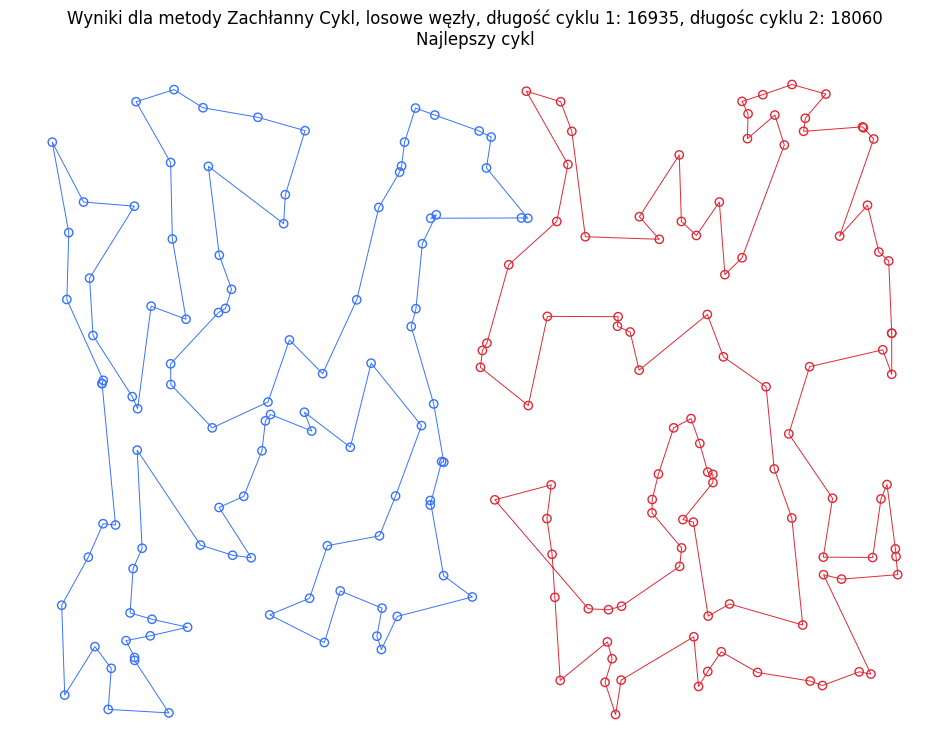

In [63]:
fig, ax = plt.subplots(figsize=(12,9))
plt.scatter(np.array(cycle_1).T[0],np.array(cycle_1).T[1], c="none", edgecolors=cycle1_color)
plt.scatter(np.array(cycle_2).T[0],np.array(cycle_2).T[1], c="none", edgecolors=cycle2_color)
plt.plot(np.array(cycle_1).T[0],np.array(cycle_1).T[1], c=cycle1_color, lw=0.7)
plt.plot(np.array(cycle_2).T[0],np.array(cycle_2).T[1], c=cycle2_color, lw=0.7)
plt.title(f"Wyniki dla metody {method}, {pick}, długość cyklu 1: {cycle_length(cycle1, distance_matrix)}, długośc cyklu 2: {cycle_length(cycle2, distance_matrix)}\n{which_order}")
nn = plt.axis(False)
fig.savefig(f"{method_sign}_{option}_{pick_method}_{instance}.png",bbox_inches='tight', pad_inches=0.05)

In [50]:
cost_array = np.array(d['result'][0])+np.array(d['result'][1])

In [51]:
print(f"Najmniejsza długość łączna cykli: {np.min(cost_array)}")

Najmniejsza długość łączna cykli: 34995


In [52]:
print(f"Najdłuższa długość łączna cykli: {np.max(cost_array)}")

Najdłuższa długość łączna cykli: 41736


In [53]:
print(f"Średnia długość sumy cykli: {np.mean(cost_array)}")

Średnia długość sumy cykli: 38485.78
